### Introduction
In this tutorial, we will explore the "Grammar of Graphics" framework for data visualization. This framework is well known among statisticians and data scientists who work with Hadley Wickham's 'ggplot2' library in R. The "Grammar of Graphics" provides a way of thinking of graphics in terms of discrete components, which are universal to all graphics. Here, we will work with the 'Plotnine' library, which attempts ports ggplot2 functionality to Python. Specifically, we will use plotnine to visualize a dataset of Airbnb listings in New York City.

### Installing the Libraries and Accessing the Data

To get started, we will need to make sure that we have the plotnine library installed on our machine. We will assume that you already have installed all the libraries, namely Pandas, that we have previously worked with in this class. 

To install plotnine, simply type:
#### $ pip3 install plotnine
on the command line.

In this tutorial, we will be working with the New York City Airbnb dataset, which can be found on Kaggle.

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernels

The actual CSV file we'll be using is called AB_NYC_2019.csv and should be located in the TAR file of this tutorial. If you are having trouble finding it, you can try downloading it directly from the Kaggle link.

In [1]:
import pandas as pd
import warnings;
warnings.filterwarnings('ignore');
from plotnine import *
nyc_airbnb_data = pd.read_csv('AB_NYC_2019.csv',engine = 'python')
nyc_airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### The Grammar of Graphics
In this portion of the tutorial, we will run through some basic terminology and components involving ggplot and the Grammar of Graphics framework. We will then use these to produce simple bar plots to visualize some of the categorical data in the Airbnb dataset, progressively making these more aesthetically pleasing, as well as more complex. 

We will begin with a simple barplot showing the distributions for the neighborhood 'Neighborhood Groups' variable.

#### Barplot: First Attempt
The Grammar of Graphics tells us that the crucial elements neccesary for all plot are data and aesthetic mappings that describe how certain variables in the data should be  mapped to aesthetic attributes that will comprise the plot. Here, we see that the data is our nyc_airbnb_data dataset, and in our aesthetic mapping, we map the variable 'neighborhood_group' to the x axis of our plot. All ggplots begin with the simple function call ggplot(). Here, we can specify the data as well as the aesthetic mapping. Following this, we can add various "layers" to the graphic, as we will see. 

Once we have a sense of our data and aesthetic mapping, we can add layers onto our plot These include things like gemoetric objects and statistical tranformations. Here, we construct a simple barplot by adding a geometric object, geom_bar().

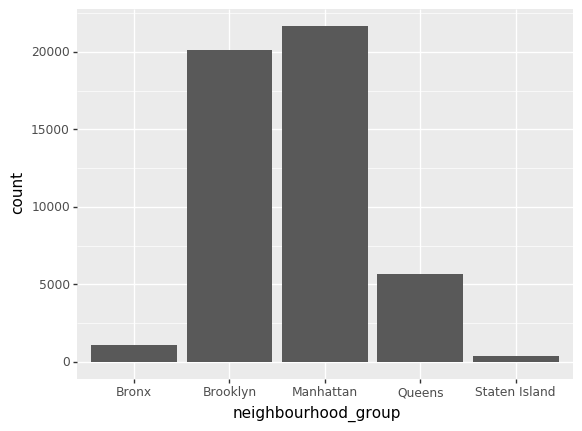

<ggplot: (-9223363275852090936)>

In [2]:
nyc_airbnb_data.columns.values
ggplot(nyc_airbnb_data,aes(x = 'neighbourhood_group')) + geom_bar()

#### Barplot: Prettier

Well, this doesn't look too appealing. Let's add in some colors and title/axis labels to make this look nicer. Note how these can be added quite seamlessly. To add a generic color to all bars, we specify the color in the 'fill' parameter of geom_bar. To add labels, we can specify paramters within our labs() function which we add to the ggplot. 

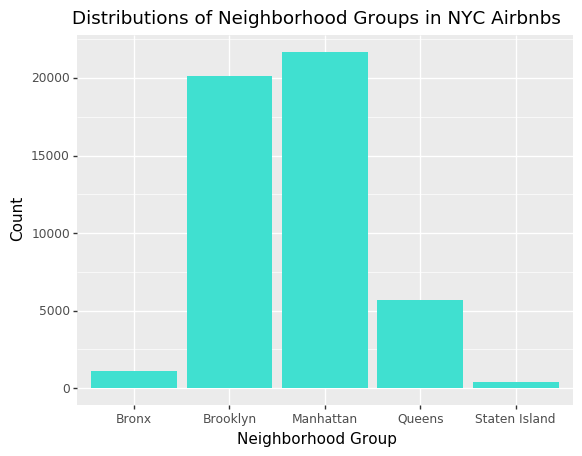

<ggplot: (8761002699426)>

In [3]:
barplot2 = ggplot(nyc_airbnb_data,aes(x = 'neighbourhood_group')) + geom_bar(fill = "turquoise") + labs(title = "D\
istributions of Neighborhood Groups in NYC Airbnbs",x = "Neighborhood Group",y = "Count")
barplot2

### Visualizing 2-D Categorical Data

With ggplot, visualizing the conditional distribution of second categorical variable through a stacked or side-by-side barplot is as easy as adjusting our aesthetic mapping, through the 'fill' parameter. Here, instead of using the fill paramter in the geom_bar function (which would apply the same color consistently  to all bars), we set the fill paramter to our categorical variable of interest within the aesthetic mapping itself.


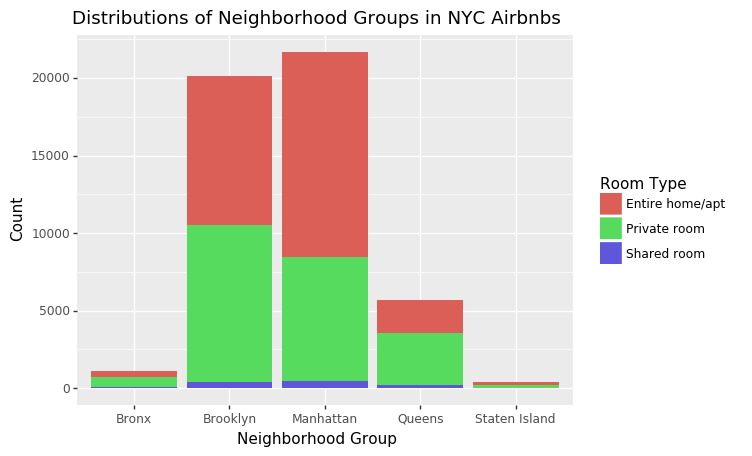

<ggplot: (-9223363275852068187)>

In [4]:
barplot_stacked = ggplot(nyc_airbnb_data,aes(x = 'neighbourhood_group',fill = "room_type")) + geom_bar() + labs(title = "D\
istributions of Neighborhood Groups in NYC Airbnbs",x = "Neighborhood Group",y = "Count",fill = "Room Type")
barplot_stacked

The default resulting plot will be a stacked barplot. We can enter the parameter position = 'dodge' in the geom_bar call to turn this into a side-by-side barplot. Usually, stacked barplots are better for visualizing relative comparisons, while side-by-side barplots are better for visualizing absolute comparisons between categories.

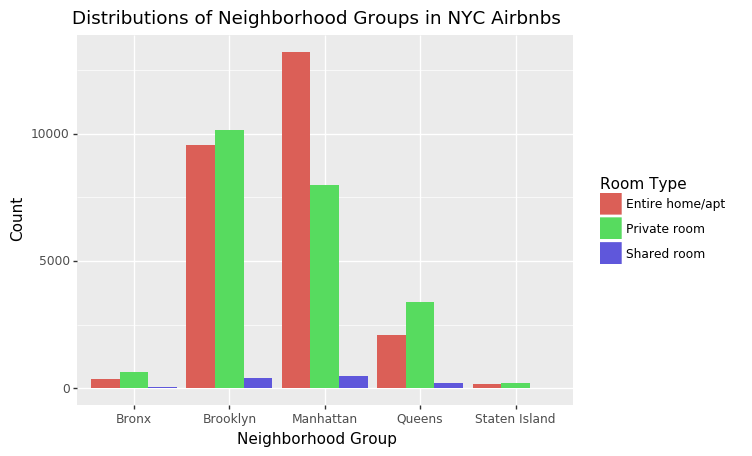

<ggplot: (8761002683477)>

In [5]:
barplot_sidebyside = ggplot(nyc_airbnb_data,aes(x = 'n\
eighbourhood_group',fill = "room_type")) + geom_bar(position = "dodge") + labs(title = "D\
istributions of Neighborhood Groups in NYC Airbnbs",x = "Neighborhood Group",y = "Count",fill = "Room Type")
barplot_sidebyside 

Instead of creating a side by side or stacked barplot, we can add a facet_wrap() to our ggplot in order to facet on the second categorical variable. This creates multiple barplots that differ by the second categorical variable. facet_wrap() allows us to specify the number of rows or columns we want the graphs to take up. facet_wrap() also allows us to specify how we want each faceted graph displayed visually. Here we decide to show each graph on a separate row. 

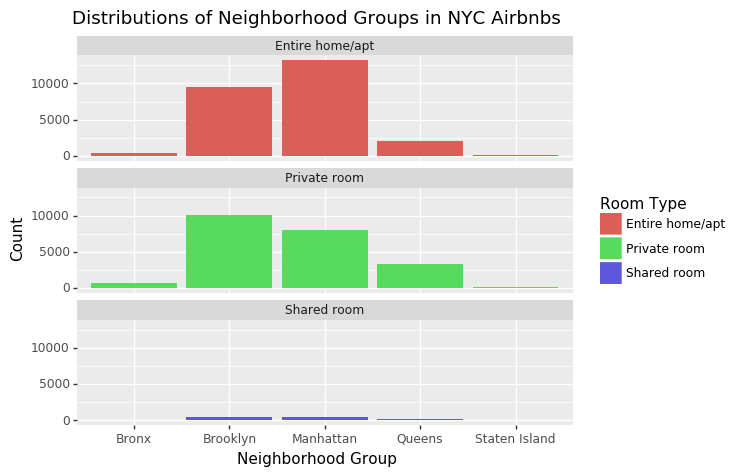

<ggplot: (8761002661601)>

In [6]:
barplot_facet = ggplot(nyc_airbnb_data,aes(x = 'n\
eighbourhood_group',fill = 'room_type')) + geom_bar() + labs(title = "D\
istributions of Neighborhood Groups in NYC Airbnbs",x = "Neighborhood Group",y = "Count",fill = "Room Type")\
+ facet_wrap('room_type',nrow = 3)
barplot_facet

### Categorical and Quantitative Data

Now, lets apply what we learned about the grammar of graphics to create some boxplots to we can get a better understanding of Airbnb pricing in New York City. To make boxplots, we must specify a categorical and quantitative variable in our aesthetic mapping and add the geometric object geom_boxplot() to the ggplot. We'll use a consistent fill here.

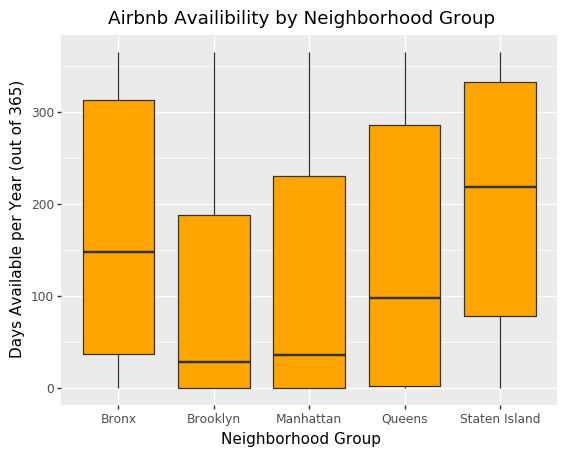

<ggplot: (8761002682807)>

In [7]:
boxplot_neighborhoodgroup_basic = ggplot(nyc_airbnb_data,\
                aes(x = 'neighbourhood_group',y = "availability_365"))\
                + geom_boxplot(fill = "orange")\
                + labs(title = "Airbnb Availibility by Neighborhood Group",x = "Neighborhood Group",\
                y = "Days Available per Year (out of 365)")

boxplot_neighborhoodgroup_basic

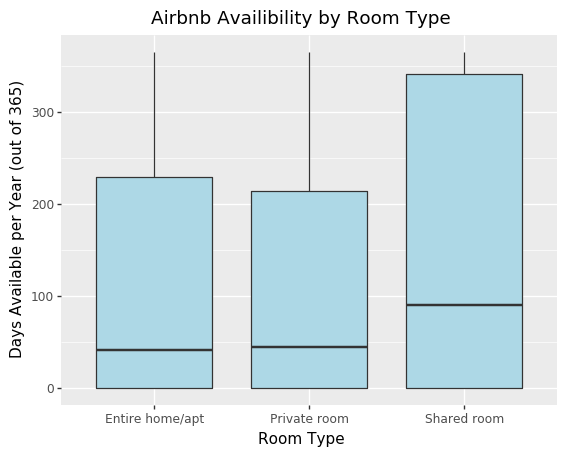

<ggplot: (-9223363275852068250)>

In [8]:
boxplot_neighborhoodgroup_basic = ggplot(nyc_airbnb_data,\
                aes(x = 'room_type',y = "availability_365" ))\
                + geom_boxplot(fill = "lightblue")\
                + labs(title = "Airbnb Availibility by Room Type",x = "Room Type",\
                y = "Days Available per Year (out of 365)")

boxplot_neighborhoodgroup_basic

Lets change our mapping on y to price to see if Airbnb prices differ across the neighborhood groups. Are we able to make a reasonable comparison?

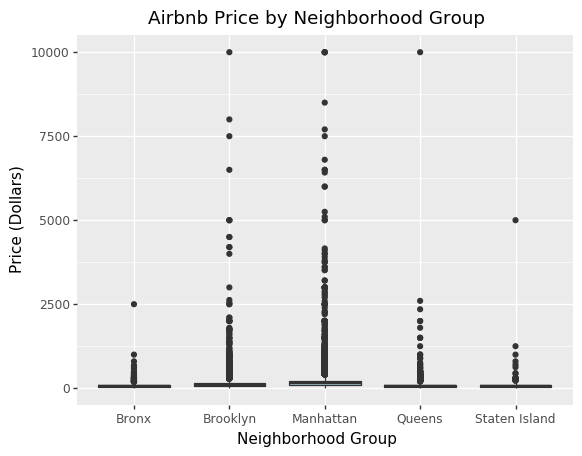

<ggplot: (-9223363275852072616)>

In [9]:
boxplot_neighborhoodgroup_basic = ggplot(nyc_airbnb_data,\
                aes(x = 'neighbourhood_group',y = "price" ))\
                + geom_boxplot(fill = "lightblue")\
                + labs(title = "Airbnb Price by Neighborhood Group",x = "Neighborhood Group",\
                y = "Price (Dollars)")

boxplot_neighborhoodgroup_basic

It's a bit difficult to compare these boxplots, due to the large amount of variation and outliers in prices. Sometimes, transformations  such as logarithmic transformations can make it easier to visually compare such data. Transformations are treated as another "layer" in the grammar of graphics. We can do this easily in ggplot by adding scale_y_continuous(trans = "log10") to our plot. Other transformations, such as square_root or log2 can also be specified in the scaling functions.

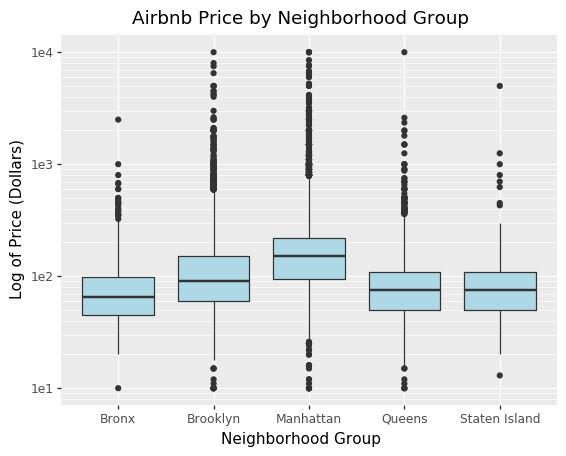

<ggplot: (-9223363275852100022)>

In [10]:
boxplot_neighborhoodgroup_price_tran = ggplot(nyc_airbnb_data,\
                aes(x = 'neighbourhood_group',y = "price" ))\
                + geom_boxplot(fill = "lightblue")\
                + labs(title = "Airbnb Price by Neighborhood Group",x = "Neighborhood Group",\
                y = "Log of Price (Dollars)") + scale_y_continuous(trans = "log10")

boxplot_neighborhoodgroup_price_tran

Let's repeat this with to visualize the transformed distributions of price between room types.

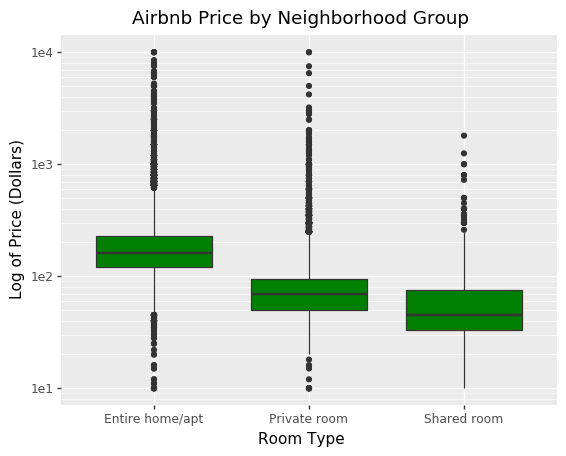

<ggplot: (-9223363275852120597)>

In [11]:
boxplot_roomtype_price_tran = ggplot(nyc_airbnb_data,\
                aes(x = 'room_type',y = "price" ))\
                + geom_boxplot(fill = "green")\
                + labs(title = "Airbnb Price by Neighborhood Group",x = "Room Type",\
                y = "Log of Price (Dollars)") + scale_y_continuous(trans = "log10")

boxplot_roomtype_price_tran

### 2-D Quantitative Data and Scatterplots

Now, lets explore the visualization of 2-D scatterplot with ggplot. We'll do this by visualizing the location data (longitude and lattitude) of the Airbnbs in our dataset. Afterwards, we will see if we can determine any patterns in the locations based on other variables. 

We can create a scatter plot by placing two quantitiative variables in our x and y aesthetic mappings and adding the geometric object, geom_point.

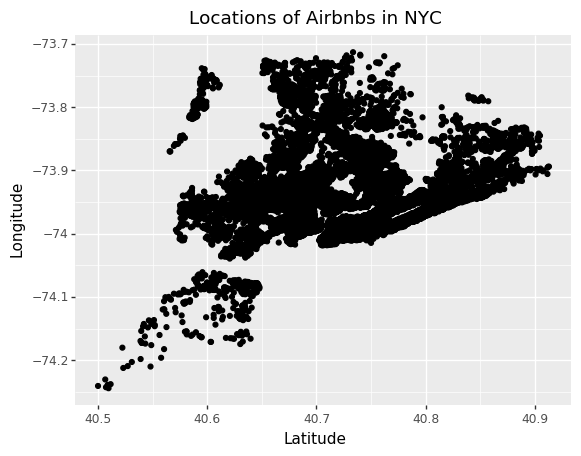

<ggplot: (-9223363275852163033)>

In [12]:
scatterplot_location = ggplot(data = nyc_airbnb_data, mapping = aes(x = 'latitude',y = 'longitude')) +\
geom_point() + labs(title = "Locations of Airbnbs in NYC",x = "Latitude",y = "Longitude")
scatterplot_location

We can fill these points based on some other categorical attribute. This can help us see where Airbnbs with certain attributes are located relative to others.

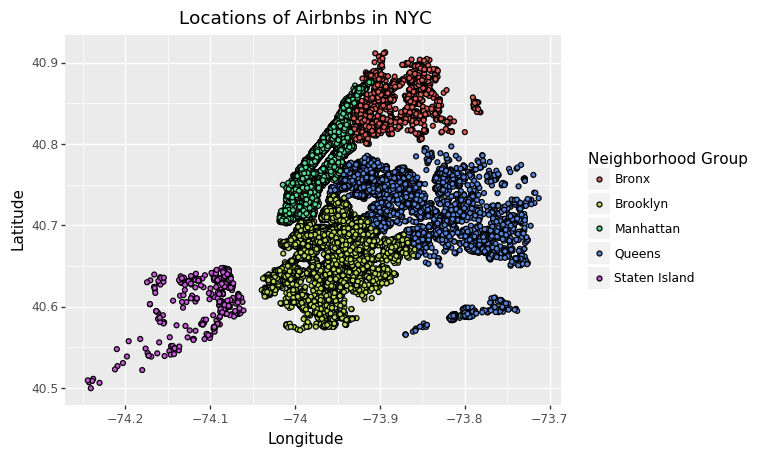

<ggplot: (8761002594445)>

In [13]:
scatterplot_location = ggplot(data = nyc_airbnb_data, mapping = aes(\
x = 'longitude',y = 'latitude',fill = "neighbourhood_group")) +\
geom_point() + labs(title = "Locations of Airbnbs in NYC",x = "Longitude",y = "Latitude",fill = "Neighborhood Group")
scatterplot_location

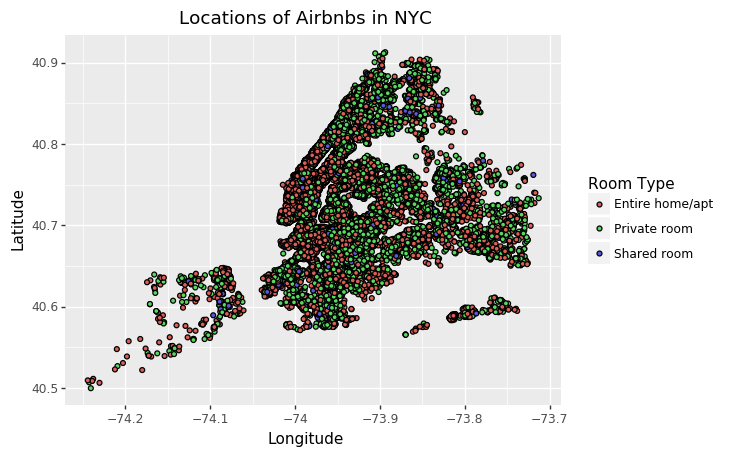

<ggplot: (-9223363275852764314)>

In [14]:
scatterplot_location_rt = ggplot(data = nyc_airbnb_data, mapping = aes(\
x = 'longitude',y = 'latitude',fill = "room_type")) +\
geom_point() + labs(title = "Locations of Airbnbs in NYC",x = "Longitude",y = "Latitude",fill = "Room Type")
scatterplot_location_rt

We can also facet our scatter plots on a second categorical variable.

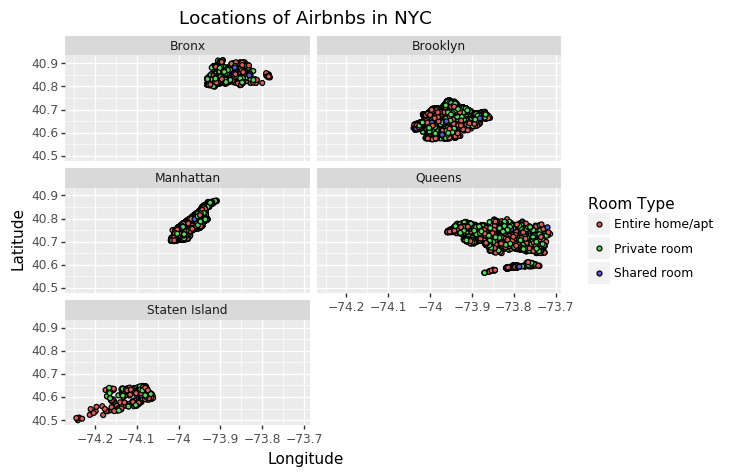

<ggplot: (-9223363275852757311)>

In [15]:
scatterplot_location_facet = ggplot(data = nyc_airbnb_data, mapping = aes(\
x = 'longitude',y = 'latitude',fill = "room_type")) +\
geom_point() + labs(title = "Locations of Airbnbs in NYC",x = "Longitude",y = "Latitude",fill = "Room Type")\
+ facet_wrap("neighbourhood_group",nrow = 3)
scatterplot_location_facet

Lets see how availibility varies across the neighborhood groups.

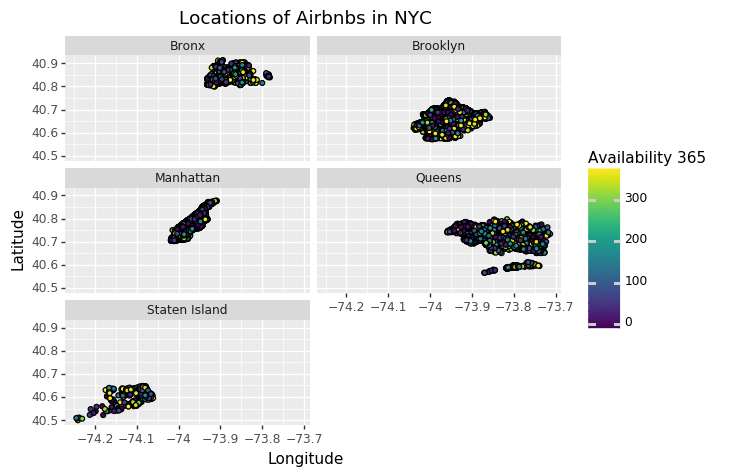

<ggplot: (8761001974171)>

In [16]:
scatterplot_location_facet2 = ggplot(data = nyc_airbnb_data, mapping = aes(\
x = 'longitude',y = 'latitude',fill = "availability_365")) +\
geom_point() + labs(title = "Locations of Airbnbs in NYC",x = "Longitude",y = "Latitude",fill = "Availability 365")\
+ facet_wrap("neighbourhood_group",nrow = 3)
scatterplot_location_facet2

### Histograms and Densities

Finally, lets see how we can use ggplot to visualize histograms and the associate density functions.

To create histograms, we simply have a single quantitative x variable mapped to our x aestheic. To make a stacked histogram, we can map fill to a categorical variable. We then add the geom_histogram geometric object. Within this, we can pass the parameter alpha to adjust the transparency level of the resulting histogram.

Instead of creating histograms, we can create similar density plots by adding geom_density instead of geom_histogram.

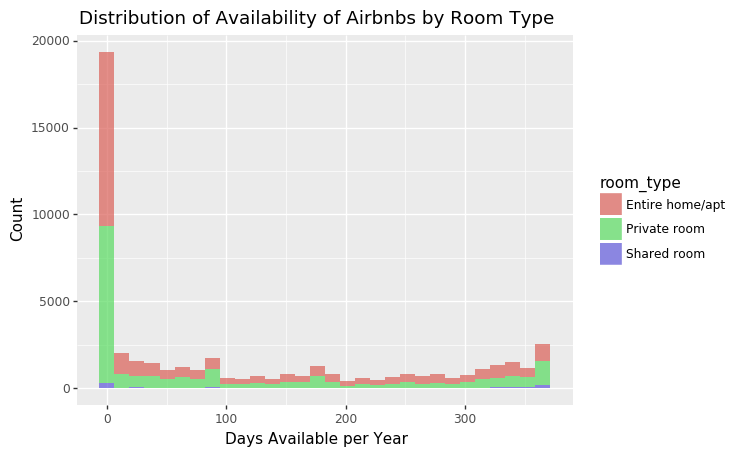

<ggplot: (-9223363275853638375)>

In [17]:
availability_hist = ggplot(nyc_airbnb_data,aes(x = 'availability_365',fill = "room_type")) + geom_histogram(alpha = 0.7)\
+ labs(title = "Distribution of Availability of Airbnbs by Room Type",x = "Days Available per Year", y = "Count")
availability_hist

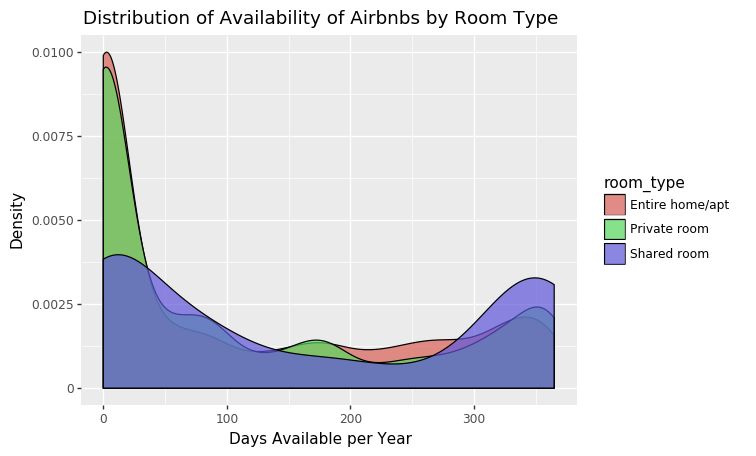

<ggplot: (-9223363275853599926)>

In [18]:
avalability_density = ggplot(nyc_airbnb_data,aes(x = 'availability_365',fill = "room_type")) + geom_density(alpha = 0.7)\
+ labs(title = "Distribution of Availability of Airbnbs by Room Type",x = "Days Available per Year", y = "Density")
avalability_density

### A Final Word on Themes

Plotnine and ggplot allow us great flexibility to work with themes. We can customize the appearance of elements ranging from fonts, axis ticks, panel background, text color, and legend box. Below, I'll demonstrate this with a personal theme I created earlier on some of the graphs that we've already made. Essentially, we can create and store our own themes as variables, which can then be applied to graphs as we please.

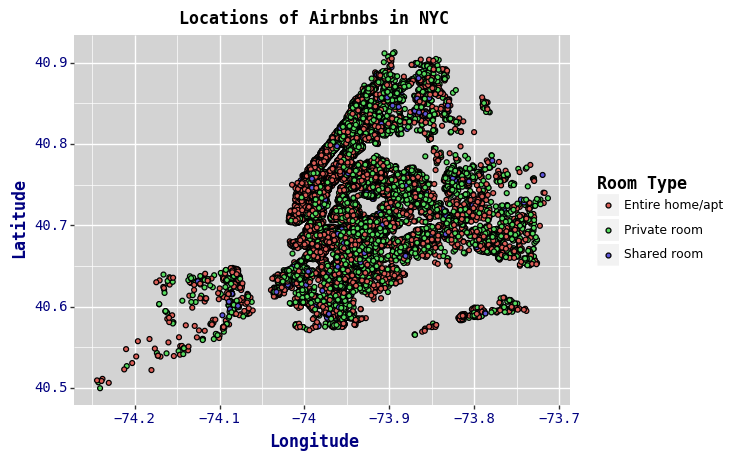

<ggplot: (-9223363275852853255)>

In [22]:
#We can store our theme as a variable, allowing us to easily apply it to any graphic.
aayushj_theme = theme(panel_background = element_rect(fill = "lightgrey", \
        colour = "grey"), axis_text = element_text(family = "monospace", colour = "navy", size = 10)\
        , axis_title = element_text(family = "monospace", colour = "navy", size = 12, face = "bold"), \
        title = element_text(family = "monospace", colour = "black", size = 12, face = "bold"))


scatterplot_location_themed = ggplot(data = nyc_airbnb_data, mapping = aes(\
x = 'longitude',y = 'latitude',fill = "room_type")) +\
geom_point() + labs(title = "Locations of Airbnbs in NYC",x = "Longitude",y = "Latitude",fill = "Room Type")
scatterplot_location_themed + aayushj_theme



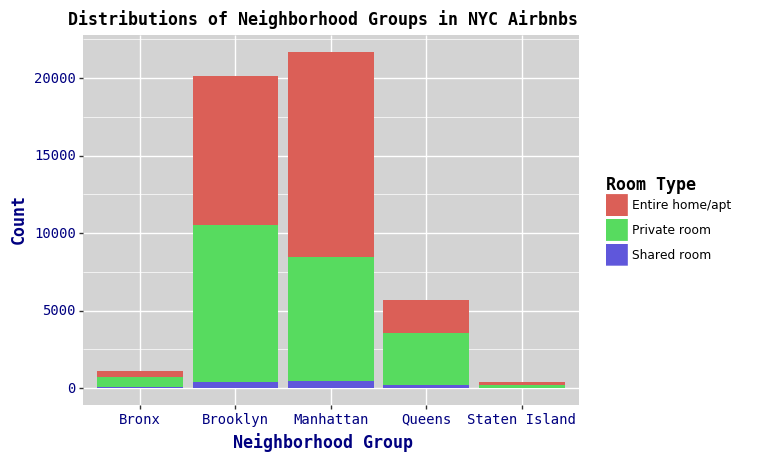

<ggplot: (-9223363275852865399)>

In [23]:
barplot_stacked_themed = ggplot(nyc_airbnb_data,aes(x = 'neighbourhood_group',fill = "room_type")) + geom_bar() + labs(title = "D\
istributions of Neighborhood Groups in NYC Airbnbs",x = "Neighborhood Group",y = "Count",fill = "Room Type")
barplot_stacked_themed + aayushj_theme

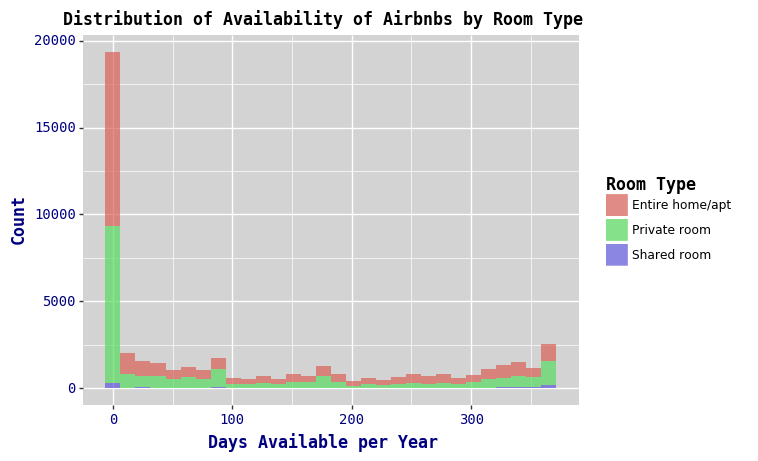

<ggplot: (8761001913983)>

In [24]:
availability_hist_themed = ggplot(nyc_airbnb_data,aes(x = 'availability_365',fill = "room_type")) + geom_histogram(alpha = 0.7)\
+ labs(title = "Distribution of Availability of Airbnbs by Room Type",x = "Days Available per Year", y = "Count",\
       fill = "Room Type")
availability_hist_themed + aayushj_theme

### Conclusion

We see that plotnine is an extremely useful tool to create graphics in an efficient and intuitive manner. With only a few crucial components including data, aesthetic mappings, geometric objects, labels, transformations, and themes, we have the ability to endlessly customize graphics to fit our need with only slight alterations to the base code. Thinking about possible graphics in terms of these "layers" is incredibly useful in helping us determine how exactly we want to visualize our data.

For further information on plotnine and ggplot2, please take a look at the following links. The first provides the full documentation of the plotline library, as well as links to code for more advanced graphics that can be created with the library. 

The second is a link to a PDF of the book 'ggplot2: Elegant Graphics for Data Analysis' by Hadley Wickham, the creator of ggplot2. The book discusses more of the philosophy behind grammar of graphics and goes into details of various features of ggplot. Note that some of the funcitonality described in the book may not currently be ported into plotnine, so be sure to check back with the plotnine documentation.

https://plotnine.readthedocs.io/en/stable/index.html

http://moderngraphics11.pbworks.com/f/ggplot2-Book09hWickham.pdf

I hope this basic tutorial on data visualization with plotnine was informative and that you are inspired to work with this library to do data science visualization in Python.